In [1]:
from sklearn.base import BaseEstimator
import numpy as np

#분류기 1
class MyDummyClassifier(BaseEstimator):
    def fit(self, X, y=None):
        pass

    def predict(self, X):
        pred = np.zeros( (X.shape[0],1))
        for i in range(X.shape[0]):  #sex==1, survived=0으로 예측, 아니면 1로 예측
            if X['Sex'].iloc[i] == 1:
                pred[i] = 0
            else :
                pred[i] = 1
        return pred

In [3]:
from sklearn.preprocessing import LabelEncoder

# Null 처리 함수
def fillna(df):
    df['Age'].fillna(df['Age'].mean(), inplace=True)
    df['Cabin'].fillna('N', inplace=True)
    df['Embarked'].fillna('N', inplace=True)
    df['Fare'].fillna(0, inplace=True)
    return df

# 머신러닝 알고리즘에 불필요한 피처 제거
def drop_features(df):
    df.drop(['PassengerId', 'Name', 'Ticket'], axis=1, inplace=True)
    return df

# 레이블 인코딩 수행.
def format_features(df):
    df['Cabin'] = df['Cabin'].str[:1]
    features = ['Cabin', 'Sex', 'Embarked']
    for feature in features:
        le = LabelEncoder()
        le = le.fit(df[feature])
        df[feature] = le.transform(df[feature])
    return df

# 앞에서 설정한 데이터 전처리 함수 호출
def transform_features(df):
    df = fillna(df) 
    df = drop_features(df)
    df = format_features(df)
    return df

In [4]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# data load

titanic_df = pd.read_csv('titanic_train.csv')
y_titanic_df = titanic_df['Survived']
X_titanic_df = titanic_df.drop('Survived', axis=1)

#전처리
X_titanic_df = transform_features(X_titanic_df)
#데이터셋 분할
X_train, X_test, y_train, y_test = train_test_split(X_titanic_df,y_titanic_df, test_size=0.2, random_state=0 )


C:\Users\ylee\AppData\Local\Temp\ipykernel_31564\2334727292.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Age'].fillna(df['Age'].mean(), inplace=True)
C:\Users\ylee\AppData\Local\Temp\ipykernel_31564\2334727292.py:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For examp

In [5]:
# 모델 생성& 학습
myclf = MyDummyClassifier()
myclf.fit(X_train, y_train)


# 정확도

In [6]:
my_pred = myclf.predict(X_test)

accuracy_score(y_test, my_pred)

0.7877094972067039

# 오차행렬

In [10]:
from sklearn.metrics import confusion_matrix

confusion_matrix(y_test, my_pred) #row : 실제값, col : 예측

array([[92, 18],
       [20, 49]], dtype=int64)

In [12]:
from sklearn.metrics import precision_score, recall_score
precision_score(y_test, my_pred), recall_score(y_test, my_pred)

(0.7313432835820896, 0.7101449275362319)

#MNIST dataset - 손글씨 데이터 셋

In [8]:
class MyFakeClassifier(BaseEstimator):
    def fit(self, X,y):
        pass

    def predict(self, X):
        return np.zeros( (len(X), 1), dtype=bool )

In [7]:
from sklearn.datasets import load_digits 


#Mnist dataset
digits = load_digits()
digits.data.shape  #1797개 샘플, 64개 특성 - 8x8 픽셀

(1797, 64)

# 149 페이지의 MyFakeClassifier 를 이용한 정확도 측정

In [ ]:
# 오차행렬 

In [14]:
#titanic_df
X_titanic_df.head(), y_titanic_df.head()

(   Pclass  Sex   Age  SibSp  Parch     Fare  Cabin  Embarked
 0       3    1  22.0      1      0   7.2500      7         3
 1       1    0  38.0      1      0  71.2833      2         0
 2       3    0  26.0      0      0   7.9250      7         3
 3       1    0  35.0      1      0  53.1000      2         3
 4       3    1  35.0      0      0   8.0500      7         3,
 0    0
 1    1
 2    1
 3    1
 4    0
 Name: Survived, dtype: int64)

# 정밀도, 재현율

In [18]:
#전처리
#X_titanic_df = transform_features(X_titanic_df)
X_train, X_test, y_train, y_test = train_test_split(X_titanic_df, y_titanic_df, test_size=0.2, random_state=11)

In [22]:
#p156
def get_clf_eval(y_test, pred):
    confusion = confusion_matrix(y_test, pred)
    accuracy = accuracy_score(y_test, pred)
    precision = precision_score(y_test, pred)
    recall = recall_score(y_test, pred)

    print(confusion)
    print('*'*20)
    print(accuracy, precision, recall)

In [23]:
#로지스틱회귀 분류모델 생성
from sklearn.linear_model import LogisticRegression

lr_clf = LogisticRegression()
lr_clf.fit(X_train, y_train)
pred = lr_clf.predict(X_test)

#정확도, 정밀도, 재현율
get_clf_eval(y_test, pred)

[[104  14]
 [ 13  48]]
********************
0.8491620111731844 0.7741935483870968 0.7868852459016393


c:\Users\ylee\anaconda3\envs\ml_env\lib\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [25]:
pred_proba = lr_clf.predict_proba(X_test)

In [26]:
pred_proba_result = np.concatenate([pred_proba, pred.reshape(-1,1)], axis=1)
pred_proba_result

array([[0.46157033, 0.53842967, 1.        ],
       [0.87858018, 0.12141982, 0.        ],
       [0.87720739, 0.12279261, 0.        ],
       [0.88280949, 0.11719051, 0.        ],
       [0.85494605, 0.14505395, 0.        ],
       [0.88229211, 0.11770789, 0.        ],
       [0.88834807, 0.11165193, 0.        ],
       [0.20906827, 0.79093173, 1.        ],
       [0.78247388, 0.21752612, 0.        ],
       [0.3700126 , 0.6299874 , 1.        ],
       [0.89987508, 0.10012492, 0.        ],
       [0.87473432, 0.12526568, 0.        ],
       [0.87720145, 0.12279855, 0.        ],
       [0.88830249, 0.11169751, 0.        ],
       [0.4352521 , 0.5647479 , 1.        ],
       [0.85882876, 0.14117124, 0.        ],
       [0.90367864, 0.09632136, 0.        ],
       [0.7331396 , 0.2668604 , 0.        ],
       [0.72419586, 0.27580414, 0.        ],
       [0.17249557, 0.82750443, 1.        ],
       [0.75336692, 0.24663308, 0.        ],
       [0.61949682, 0.38050318, 0.        ],
       [0.

# 이진화 

In [28]:
# 이진화
custom_threshold = 0.4
pred_proba_1 = pred_proba[:, 1 ].reshape(-1,1) #새로운 예측값

# 정밀도, 재현율의 변화

In [29]:
from sklearn.preprocessing import Binarizer

binarizer = Binarizer(threshold = custom_threshold).fit(pred_proba_1) #새로운 예측값으로 이진화한 예측값
custom_predict = binarizer.transform(pred_proba_1)

get_clf_eval(y_test, custom_predict)

[[99 19]
 [10 51]]
********************
0.8379888268156425 0.7285714285714285 0.8360655737704918


[[104  14]
 [ 13  48]]
********************
0.8491620111731844 0.7741935483870968 0.7868852459016393

# f1-score

재현율과 정밀도의 조화 평균 : 그 모델의 전체적인 성능을 볼 때

In [30]:
from sklearn.metrics import f1_score

f1_score(y_test, pred)

0.7804878048780488

# ROC (Receiver Operation Characteristics) Curv

민감도 어떻게 달라지는지 보는 지표 (=재현율, 실제 양성을 맞춘 비율)
거짓긍정율 = 1- 특이도

좌측상단 > 1에 가까울 수록 좋은 모델

ROC-AUC : ROC 곡선 아래 면적값, 더 클 수록 좋은 모델

In [31]:
pred_proba_class1 = lr_clf.predict_proba(X_test)[:, 1]
pred_proba_class1

array([0.53842967, 0.12141982, 0.12279261, 0.11719051, 0.14505395,
       0.11770789, 0.11165193, 0.79093173, 0.21752612, 0.6299874 ,
       0.10012492, 0.12526568, 0.12279855, 0.11169751, 0.5647479 ,
       0.14117124, 0.09632136, 0.2668604 , 0.27580414, 0.82750443,
       0.24663308, 0.38050318, 0.14554527, 0.18494812, 0.11206564,
       0.23470595, 0.1403271 , 0.07395373, 0.28072376, 0.30515505,
       0.94734442, 0.81770518, 0.12671018, 0.8256362 , 0.3996279 ,
       0.23470595, 0.07233564, 0.61152796, 0.05304285, 0.10397129,
       0.35038675, 0.08316088, 0.82207232, 0.70792142, 0.6303243 ,
       0.63034047, 0.9186499 , 0.35636701, 0.94893904, 0.11209994,
       0.59419868, 0.11169751, 0.132921  , 0.72502006, 0.30972567,
       0.19656787, 0.22648751, 0.12279364, 0.15439358, 0.43270567,
       0.2804339 , 0.10093987, 0.54660071, 0.51356652, 0.44452222,
       0.09463169, 0.66700991, 0.59421104, 0.95192387, 0.14784176,
       0.12917258, 0.16867832, 0.10397352, 0.94792299, 0.19874

In [32]:
import matplotlib.pyplot as plt

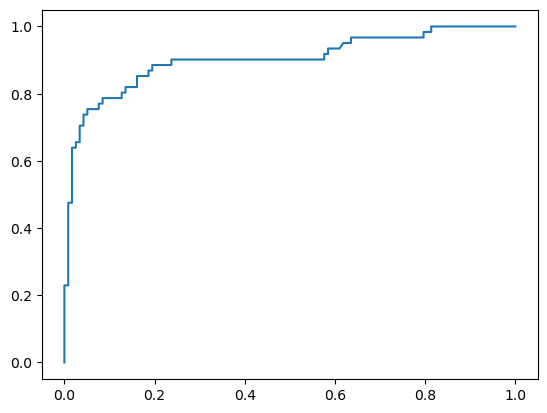

In [33]:
from sklearn.metrics import roc_curve

fprs, tprs, thresholds = roc_curve(y_test, pred_proba_class1)

#시각화
plt.plot(fprs,tprs, label='ROC' )


# ROC-AUC

In [35]:
from sklearn.metrics import roc_auc_score
roc_auc_score(y_test, pred_proba_class1)

0.902542372881356

모델1의 ROC-AUC = 0.92 - 모델의 판별성능이 우수
모델2의 ROC-AUC = 0.78 - 모델1보다 성능이 낮다.